<a href="https://colab.research.google.com/github/ungvietanh20172394/COF-Tank/blob/main/testModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import joblib
# from sklearn.tree import DecisionTreeClassifier
import numpy as np

In [10]:
def predictHeightFluid(leavedike, leavedikeremainonsite, gooffsite, cof):
    model = joblib.load('fludiHeightTank.pkl')
    input = np.array([leavedike, leavedikeremainonsite, gooffsite, cof])
    result = model.predict([input])
    return result[0]

In [ ]:
a = []
for x in range(0,100,15):
  for y in range(0,100,15):
    for z in range(0,100,15):
        for o in range(80,100,3):
          a.append(predictHeightFluid(x/100, y/100, z/100, o/100))


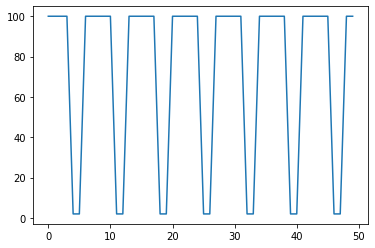

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = np.array([0, 6])
ypoints = np.array([0, 250])

plt.plot(a[150:200])
plt.show()

In [ ]:
print("haha")

haha


In [2]:
import math
import random
import numpy as np
import time
import pandas as pd

In [3]:
_C1 = 31623.0
_C10 = 9.744
_C11 = 0.145
_C12 = 1.8
_C13 = 6.29
_C14 = 1.0
_C15 = 4.685
_C16 = 30.89
_C17 = 0.001481
_C18 = 0.005
_C19 = 1.085
_C2 = 1000.0
_C20 = 1.013
_C21 = 5328.0
_C22 = 5.8
_C23 = 0.45
_C24 = 2.6
_C25 = 0.0296 
_C26 = 100.0 
_C27 = 1.0 
_C28 = 1000.0 
_C29 = 0.0004303 
_C3 = 4536.0 
_C30 = 9.76E-08 
_C31 = 864.0
_C32 = 0.543
_C33 = 0.0815
_C34 = 86.4 
_C35 = 2.382
_C36 = 30.5
_C37 = 1.408E-08
_C38 = 1.1341
_C39 = 3.9365
_C4 = 2.205 
_C40 = 5.9352 
_C5 = 25.2 
_C6 = 55.6 
_C7 = 1.0 
_C8 = 0.0929
_C9 = 0.123

In [4]:
obj = [0.00072, 0, 0, 0.000002, 0.00072, 5000, 0, 0, 120000, 5, 0, 0, 50]
class CA_TANK_BOTTOM:
    def __init__(self, Soil_type, TANK_FLUID, Swg, TANK_DIAMETER, FLUID_HEIGHT, PREVENTION_BARRIER, EnvironSensitivity, MATERIAL_COST, PRODUCTION_COST, P_lvdike,P_onsite,P_offsite,Concrete_Asphalt):
        self.Soil_type = Soil_type
        self.TANK_FLUID = TANK_FLUID
        self.Swg = Swg
        self.TANK_DIAMETER = TANK_DIAMETER
        self.FLUID_HEIGHT = FLUID_HEIGHT
        # self.API_COMPONENT_TYPE_NAME = API_COMPONENT_TYPE_NAME
        self.PREVENTION_BARRIER = PREVENTION_BARRIER
        self.EnvironSensitivity =EnvironSensitivity
        self.MATERIAL_COST = MATERIAL_COST
        self.PRODUCTION_COST = PRODUCTION_COST
        self.P_lvdike = P_lvdike
        self.P_onsite = P_onsite
        self.P_offsite = P_offsite
        self.Concrete_Asphalt = Concrete_Asphalt

    def FC_Category(self, fc):
        if (fc <= 10000):
            return "A"
        elif (fc <= 100000):
            return "B"
        elif (fc <= 1000000):
            return "C"
        elif (fc <= 10000000):
            return "D"
        else:
            return "E"

    def n_rh(self, i):
        if (i==4):
            return 1
        else:
            C36 = _C36
            return max(pow(self.TANK_DIAMETER / C36, 2), 1)

    def k_h_bottom(self):
        k_h = [0, 0, 0]
        if (self.Soil_type == "Coarse Sand"):
            k_h[0] = 0.1
            k_h[1] = 0.01
            k_h[2] = 0.33
        elif(self.Soil_type == "Fine Sand"):
            k_h[0] = 0.01
            k_h[1] = 0.001
            k_h[2] = 0.33
        elif(self.Soil_type == "Very Fine Sand"):
            k_h[0] = pow(10, -3)
            k_h[1] = pow(10, -5)
            k_h[2] = 0.33
        elif(self.Soil_type == "Silt"):
            k_h[0] = pow(10, -5)
            k_h[1] = pow(10, -6)
            k_h[2] = 0.41
        elif(self.Soil_type == "Sandy Clay"):
            k_h[0] = pow(10, -6)
            k_h[1] = pow(10, -7)
            k_h[2] = 0.45
        elif(self.Soil_type == "Clay"):
            k_h[0] = pow(10, -7)
            k_h[1] = pow(10, -8)
            k_h[2] = 0.5
        elif(self.Soil_type == "Concrete-Asphalt"):
            k_h[0] = pow(10, -10)
            k_h[1] = pow(10, -11)
            k_h[2] = 0.3
        else:
            k_h[0] = 1
            k_h[1] = 0.1
            k_h[2] = 0.4
        return k_h

    def k_h_water(self):
        C31 = _C31
        k_h = self.k_h_bottom()
        return C31 * (k_h[0] + k_h[1]) / 2

    def dn_bottom(self, i):
        if (i == 1):
            if (self.PREVENTION_BARRIER):
                dn = 3.175
            else:
                dn = 12.7
        elif (i == 4):
            dn = 250 * self.TANK_DIAMETER
        else:
            dn = 0
        return dn

    def rate_n_tank_bottom(self, i):
        try:
            C33 = _C33
            C34 = _C34
            C35 = _C35
            C37 = _C37
            C38 = _C38
            C39 = _C39
            C40 = _C40
            if (self.PREVENTION_BARRIER):
                ps= pow(self.dn_bottom(i),1.8)/(0.21*pow(0.0762,0.4))
                if (self.k_h_prod() > C34 * pow(self.dn_bottom(i), 2)):
                    return C33 * math.pi * self.dn_bottom(i) * math.sqrt(2 * 1 * 0.0762) * self.n_rh(i)
                elif (self.k_h_prod() <= C37 * pow(ps,(1 / 0.74))):
                    return C35 * 0.21 * pow(self.dn_bottom(i), 0.2) * pow(0.0762, 0.9) * pow(self.k_h_prod(),0.74) * self.n_rh(i)
                else:
                    m = C40 - 0.4324 * math.log10(self.dn_bottom(i)) + 0.5405 * math.log10(0.0762)
                    return C38 * pow(10,2 * math.log10(self.dn_bottom(i)) + 0.5 * math.log10(0.0762) - 0.74 * pow((C39 * 2 * math.log10(self.dn_bottom(i)) - math.log10(self.k_h_prod())) / m, m))
            else:
                ps = pow(self.dn_bottom(i), 1.8) / (0.21 * pow(self.FLUID_HEIGHT, 0.4))
                if (self.k_h_prod() > C34 * pow(self.dn_bottom(i), 2)):
                    return C33 * math.pi * self.dn_bottom(i) * math.sqrt(2 * 1 * self.FLUID_HEIGHT) * self.n_rh(i)
                elif (self.k_h_prod() <= C37*pow(ps,(1/0.74))):
                    return C35 * 0.21 * pow(self.dn_bottom(i), 0.2) * pow(self.FLUID_HEIGHT, 0.9) * pow(self.k_h_prod(), 0.74) * self.n_rh(i)
                else:
                    m = C40-0.4324*math.log10(self.dn_bottom(i)) + 0.5405*math.log10(self.FLUID_HEIGHT)
                    return C38*pow(10,2*math.log10(self.dn_bottom(i))+0.5*math.log10(self.FLUID_HEIGHT)-0.74*pow((C39 * 2*math.log10(self.dn_bottom(i))-math.log10(self.k_h_prod()))/m,m))
        except Exception as e:
            print("Error rate_n_tank_bottom:", e)

    def t_ld_tank_bottom(self):
        if (self.Concrete_Asphalt):
            return 7
        elif (self.PREVENTION_BARRIER):
            return 30
        else:
            return 360

    def BBL_TOTAL_TANKBOTTOM(self):
        return math.pi * pow(self.TANK_DIAMETER, 2) * self.FLUID_HEIGHT / (4 * _C13)

    def ld_n_tank_bottom(self, i):
        try:
            Bbl_total_tank_bottom = (math.pi * pow(self.TANK_DIAMETER, 2) * self.FLUID_HEIGHT * _C13) / 4
            if self.rate_n_tank_bottom(i) == 0:
                return self.t_ld_tank_bottom()
            else:
                return min(float(Bbl_total_tank_bottom) / self.rate_n_tank_bottom(i), self.t_ld_tank_bottom())
        except Exception as e:
            print("Error ld_n_tank_bottom:",e)

    def Bbl_leak_n_bottom(self, i):
        Bbl_total_tank_bottom = (math.pi * pow(self.TANK_DIAMETER, 2) * self.FLUID_HEIGHT * _C13) / (4)
        return min(self.rate_n_tank_bottom(i) * self.ld_n_tank_bottom(i), Bbl_total_tank_bottom)

    def Bbl_rupture_bottom(self):
        Bbl_total_tank_bottom = (math.pi * pow(self.TANK_DIAMETER, 2) * self.FLUID_HEIGHT* _C13) / (4)
        return Bbl_total_tank_bottom

    def GET_PL_UL(self):
        data = [0, 0]
        if (self.TANK_FLUID == "Gasoline"):
            data[0] = 684.018
            data[1] = 4.01 * pow(10, -3)
        elif(self.TANK_FLUID == "Light Diesel Oil"):
            data[0] = 734.011
            data[1] = 1.04 * pow(10, -3)
        elif(self.TANK_FLUID == "Heavy Diesel Oil"):
            data[0] = 764.527
            data[1] = 2.46 * pow(10, -3)
        elif(self.TANK_FLUID == "Fuel Oil"):
            data[0] = 775.019
            data[1] = 3.69 * pow(10, -2)
        elif (self.TANK_FLUID == "Crude Oil"):
            data[0] = 775.019
            data[1] = 3.69 * pow(10, -2)
        elif (self.TANK_FLUID == "Heavy Crude Oil"):
            data[0] = 900.026
            data[1] = 4.6 * pow(10, -2)
        elif (self.TANK_FLUID == "Heavy Fuel Oil"):
            data[0] = 900.026
            data[1] = 4.6 * pow(10, -2)
        else:
            data[0] = 1000
            data[1] = 1
        return data

    def k_h_prod(self):
        pl_ul = self.GET_PL_UL()
        return self.k_h_water() * (pl_ul[0] / 1000) * (1 / pl_ul[1])

    def vel_s_prod(self):
        kh = self.k_h_bottom()
        return self.k_h_prod() / kh[2]

    def t_gl_bottom(self):
        try:
            return self.Swg / self.vel_s_prod()
        except:
            return 1

    def Bbl_leak_groundwater(self, i):
        try:
            if (self.t_gl_bottom() < self.t_ld_tank_bottom()):
                return self.Bbl_leak_n_bottom(i) * ((self.t_ld_tank_bottom() - self.t_gl_bottom()) / self.t_ld_tank_bottom())
            else:
                return 0
        except:
            return 0

    def Bbl_leak_subsoil(self, i):
        return self.Bbl_leak_n_bottom(i) - self.Bbl_leak_groundwater(i)

    def getCost(self):
        costTANK = [0, 0, 0, 0, 0, 0]
        if (self.EnvironSensitivity == "High"):
            costTANK[0] = 10
            costTANK[1] = 50
            costTANK[2] = 500
            costTANK[3] = 3000
            costTANK[4] = 10000
            costTANK[5] = 5000
        elif (self.EnvironSensitivity == "Medium"):
            costTANK[0] = 10
            costTANK[1] = 50
            costTANK[2] = 250
            costTANK[3] = 1500
            costTANK[4] = 5000
            costTANK[5] = 1500
        elif (self.EnvironSensitivity == "Low"):
            costTANK[0] = 10
            costTANK[1] = 50
            costTANK[2] = 100
            costTANK[3] = 500
            costTANK[4] = 1000
            costTANK[5] = 500
        else:
            costTANK[0] = 0
            costTANK[1] = 0
            costTANK[2] = 0
            costTANK[3] = 0
            costTANK[4] = 0
            costTANK[5] = 0
        return costTANK

    def FC_leak_environ_bottom(self):
        cost = self.getCost()
        summa = 0
        for i in range(1,4):
            summa = summa +(self.Bbl_leak_groundwater(i) * cost[4] + self.Bbl_leak_subsoil(i) * cost[3])*obj[i-1]
        if(self.TANK_FLUID == "Water"):
            return 0
        else:
            return summa/obj[4]

    def Bbl_rupture_release_bottom(self):
        Bbl_total_tank_bottom = (math.pi * pow(self.TANK_DIAMETER, 2) * self.FLUID_HEIGHT* _C13) / (4)
        return (Bbl_total_tank_bottom * obj[3]) / obj[4]

    def Bbl_rupture_indike_bottom(self):
        indike = self.Bbl_rupture_release_bottom() * (1 - self.P_lvdike / 100)
        if(indike > 0):
            return indike
        else:
            return 0

    def Bbl_rupture_ssonsite_bottom(self):
        onsite = self.P_onsite * (self.Bbl_rupture_release_bottom() - self.Bbl_rupture_indike_bottom()) / 100
        if(onsite > 0):
            return onsite
        else:
            return 0

    def Bbl_rupture_ssoffsite_bottom(self):
        offsite = self.P_offsite * (self.Bbl_rupture_release_bottom() - self.Bbl_rupture_indike_bottom() - self.Bbl_rupture_ssonsite_bottom()) / 100
        if(offsite > 0):
            return offsite
        else:
            return 0

    def Bbl_rupture_water_bottom(self):
        water = self.Bbl_rupture_release_bottom() - (self.Bbl_rupture_indike_bottom() + self.Bbl_rupture_ssonsite_bottom() + self.Bbl_rupture_ssoffsite_bottom())
        if(water > 0):
            return water
        else:
            return 0

    def FC_rupture_environ_bottom(self):
        cost = self.getCost()
        if (self.TANK_FLUID == "Water"):
            return 0
        else:
            return self.Bbl_rupture_indike_bottom() * cost[0] + self.Bbl_rupture_ssonsite_bottom() * cost[1] + self.Bbl_rupture_ssoffsite_bottom() * cost[2] + self.Bbl_rupture_water_bottom() * cost[5]

    def FC_environ_bottom(self):
        return self.FC_leak_environ_bottom() + self.FC_rupture_environ_bottom()

    def FC_cmd_bottom(self):
        summ = obj[0] * obj[5] + obj[1] * obj[6] + obj[2] * obj[7] + obj[3] * obj[8] * pow(self.TANK_DIAMETER / _C36, 2)
        return summ * self.MATERIAL_COST / obj[4]

    def FC_PROD_BOTTOM(self):
        t = obj[0] * obj[9] + obj[1] * obj[10] + obj[2] * obj[11] + obj[3] * obj[12]
        return t * self.PRODUCTION_COST / obj[4]

    def FC_total_bottom(self):
        FC_TOTAL_BOTTOM = self.FC_cmd_bottom() + self.FC_environ_bottom() + self.FC_PROD_BOTTOM()
        if FC_TOTAL_BOTTOM == 0:
            return 100000000
        else:
            return  FC_TOTAL_BOTTOM

In [92]:
rwequipment_typeofsoil = "Clay"
rwstream_tankfluidname = "Gasoline"
rwequipment_distancetogroundwater = 2
rwcomponent_diameter = 2
rwstream_fluidheight = 150
apicomponenttypename = "Tank"
rwcomponent_releasepreventionbarrier = True
rwequipment_environmentsensitivity   = "Low"
rwmaterial_costfactor = 5
rwinputca_productioncost = 1
rwstream_fluidleavedikepercent = 22
rwstream_fluidleavedikeremainonsitepercent =32
rwstream_fluidgooffsitepercent = 9
rwcomponent_concretefoundation = False
cacal = CA_TANK_BOTTOM(Soil_type = rwequipment_typeofsoil, TANK_FLUID=rwstream_tankfluidname, Swg=rwequipment_distancetogroundwater, TANK_DIAMETER=rwcomponent_diameter, 
                    FLUID_HEIGHT=rwstream_fluidheight,
                    PREVENTION_BARRIER=bool(rwcomponent_releasepreventionbarrier), EnvironSensitivity=rwequipment_environmentsensitivity, MATERIAL_COST=rwmaterial_costfactor,
                    PRODUCTION_COST=rwinputca_productioncost, P_lvdike=rwstream_fluidleavedikepercent, P_onsite = rwstream_fluidleavedikeremainonsitepercent,
                    P_offsite = rwstream_fluidgooffsitepercent, Concrete_Asphalt = rwcomponent_concretefoundation)

a = cacal.FC_total_bottom()
print(a)

26547.627095855325


In [30]:
cacal.FC_total_bottom()

27334.824239925973

In [68]:
z = predictHeightFluid(rwstream_fluidleavedikepercent/100, rwstream_fluidleavedikeremainonsitepercent/100, rwstream_fluidgooffsitepercent/100, 88/100)
z

100

In [80]:
def kq2(per,x,y,z):
  _per = per
  h2 = rwstream_fluidheight * _per
  # print(h2)
  rwstream_fluidleavedikepercent = x
  rwstream_fluidleavedikeremainonsitepercent =y
  rwstream_fluidgooffsitepercent = z
  cacal2 = CA_TANK_BOTTOM(Soil_type = rwequipment_typeofsoil, TANK_FLUID=rwstream_tankfluidname, Swg=rwequipment_distancetogroundwater, TANK_DIAMETER=rwcomponent_diameter, 
                      FLUID_HEIGHT=h2,
                      PREVENTION_BARRIER=bool(rwcomponent_releasepreventionbarrier), EnvironSensitivity=rwequipment_environmentsensitivity, MATERIAL_COST=rwmaterial_costfactor,
                      PRODUCTION_COST=rwinputca_productioncost, P_lvdike=rwstream_fluidleavedikepercent, P_onsite = rwstream_fluidleavedikeremainonsitepercent,
                      P_offsite = rwstream_fluidgooffsitepercent, Concrete_Asphalt = rwcomponent_concretefoundation)
  b = cacal2.FC_total_bottom()
  # print(b)
  # print(b/a)
  return(b)

In [81]:
def kq1(x,y,z):
  rwstream_fluidleavedikepercent = x
  rwstream_fluidleavedikeremainonsitepercent =y
  rwstream_fluidgooffsitepercent = z
  cacal = CA_TANK_BOTTOM(Soil_type = rwequipment_typeofsoil, TANK_FLUID=rwstream_tankfluidname, Swg=rwequipment_distancetogroundwater, TANK_DIAMETER=rwcomponent_diameter, 
                    FLUID_HEIGHT=rwstream_fluidheight,
                    PREVENTION_BARRIER=bool(rwcomponent_releasepreventionbarrier), EnvironSensitivity=rwequipment_environmentsensitivity, MATERIAL_COST=rwmaterial_costfactor,
                    PRODUCTION_COST=rwinputca_productioncost, P_lvdike=rwstream_fluidleavedikepercent, P_onsite = rwstream_fluidleavedikeremainonsitepercent,
                    P_offsite = rwstream_fluidgooffsitepercent, Concrete_Asphalt = rwcomponent_concretefoundation)
  return cacal.FC_total_bottom()


In [94]:
a = []
for x in range(0,100,5):
  for y in range(0,100,5):
    for z in range(0,100,5):
        for o in range(80,95,2):
          pre = predictHeightFluid(x/100, y/100, z/100, o/100)
          thucte = kq2(pre/100,x,y,z) / kq1(x,y,z)
          if(pre == 100):
            continue
          if ((o+3)>thucte*100):
            print(x,y,z,o, pre/100,  thucte*100)

80 0 0 94 0.72 96.82533678378162
80 0 5 94 0.72 96.93787317134066
80 5 0 94 0.72 96.95201199912962
85 0 0 92 0.58 94.98245545958079
85 0 0 94 0.72 96.65497030638718
85 0 5 94 0.72 96.77293424971953
85 0 10 94 0.72 96.89203243834007
85 5 0 94 0.72 96.78775916017659
85 5 5 94 0.72 96.90101098304838
85 10 0 94 0.72 96.9219861306951
90 0 0 90 0.44 92.97385241413684
90 0 0 92 0.58 94.73038931060263
90 0 0 94 0.72 96.48692620706842
90 0 5 92 0.58 94.91524420333842
90 0 5 94 0.72 96.6101628022256
90 0 10 94 0.72 96.73464610989866
90 5 0 92 0.58 94.93848197474318
90 5 0 94 0.72 96.62565464982879
90 5 5 94 0.72 96.7440331437706
90 10 0 94 0.72 96.7659639554536
90 10 5 94 0.72 96.87936786300874
95 0 0 86 0.16 88.96347196147023
95 0 0 88 0.3 90.80289330122521
95 0 0 90 0.44 92.64231464098016
95 0 0 92 0.58 94.48173598073512
95 0 0 94 0.72 96.32115732049009
95 0 5 90 0.44 92.89903276670113
95 0 5 92 0.58 94.67427457502583
95 0 5 94 0.72 96.44951638335057
95 0 10 92 0.58 94.86885626274169
95 0 10 9